Importy

In [100]:
import pandas as pd
# import numpy as np
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import textcleaning

Wczytanie danych

In [128]:
messages = pd.read_csv('../datasets/Spam SMS/spam.csv', encoding='latin-1')
messages = messages.dropna(how="any", axis=1)
messages.columns = ['label', 'message']
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [129]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Czyszczenie danych

In [130]:
messages['message_clean_tokens'] = messages['message'].apply(textcleaning.clean_text_and_return_tokens)
messages.head()

,label,message,length,message_clean_tokens,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, great,...",go jurong point crazi avail bugi great world b...
1,ham,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif]",ok lar joke wif
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,49,"[dun, say, earli, hor, alreadi, say]",dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[dont, think, goe, usf, live, around, though]",dont think goe usf live around though


In [143]:
messages['message_clean'] = messages['message_clean_tokens'].apply(lambda tokens: ' '.join(tokens))
messages.head()

,label,message,length,message_clean_tokens,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, great,...",go jurong point crazi avail bugi great world b...
1,0,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif]",ok lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,"[dun, say, earli, hor, alreadi, say]",dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[dont, think, goe, usf, live, around, though]",dont think goe usf live around though


Zakodowanie etykiet

In [138]:
label_encoder = LabelEncoder()
messages['label'] = label_encoder.fit_transform(messages['label'])
messages.head()

,label,message,length,message_clean_tokens,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, great,...",go jurong point crazi avail bugi great world b...
1,0,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif]",ok lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,"[dun, say, earli, hor, alreadi, say]",dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[dont, think, goe, usf, live, around, though]",dont think goe usf live around though


Zapisanie wyczyszczonych danych

In [144]:
messages.to_csv('../cleaned_datasets/sms_spam.csv', sep='\t', index=False, encoding='utf-8')
messages

,label,message,length,message_clean_tokens,message_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, great,...",go jurong point crazi avail bugi great world b...
1,0,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif]",ok lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkts may...
3,0,U dun say so early hor... U c already then say...,49,"[dun, say, earli, hor, alreadi, say]",dun say earli hor alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[dont, think, goe, usf, live, around, though]",dont think goe usf live around though
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[time, tri, contact, å£, pound, prize, claim, ...",time tri contact å£ pound prize claim easi cal...
5568,0,Will Ì_ b going to esplanade fr home?,37,"[ì, b, go, esplanad, fr, home]",ì b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[piti, mood, soani, suggest]",piti mood soani suggest
5570,0,The guy did some bitching but I acted like i'd...,125,"[guy, bitch, act, like, id, interest, buy, som...",guy bitch act like id interest buy someth els ...


Wczytanie wyczyszconych danych

In [142]:
import ast
messages = pd.read_csv('../cleaned_datasets/sms_spam.csv', sep='\t', encoding='utf-8')
messages['message_clean_tokens'] = messages['message_clean_tokens'].apply(ast.literal_eval)
messages = messages.dropna(how="any", axis=1)
messages.head(10)

,label,message,length,message_clean_tokens
0,0,"Go until jurong point, crazy.. Available only ...",111,"[go, jurong, point, crazi, avail, bugi, great,..."
1,0,Ok lar... Joking wif u oni...,29,"[ok, lar, joke, wif]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[free, entri, wkli, comp, win, fa, cup, final,..."
3,0,U dun say so early hor... U c already then say...,49,"[dun, say, earli, hor, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[dont, think, goe, usf, live, around, though]"
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,"[freemsg, hey, darl, week, word, back, id, lik..."
6,0,Even my brother is not like to speak with me. ...,77,"[even, brother, like, speak, treat, like, aid,..."
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,"[request, mell, mell, oru, minnaminungint, nur..."
8,1,WINNER!! As a valued network customer you have...,158,"[winner, valu, network, custom, select, receiv..."
9,1,Had your mobile 11 months or more? U R entitle...,154,"[mobil, month, r, entitl, updat, latest, colou..."


Wizualizacja tokenów

In [125]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wiadomości nie spam

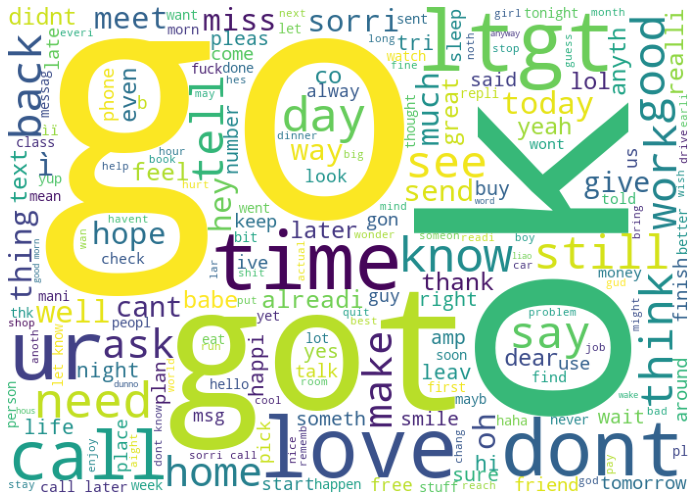

In [156]:
ham_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
ham_word_cloud.generate(' '.join(text for text in messages.loc[messages['label'] == 0, 'message_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(ham_word_cloud)
plt.show()

wiadomości spam

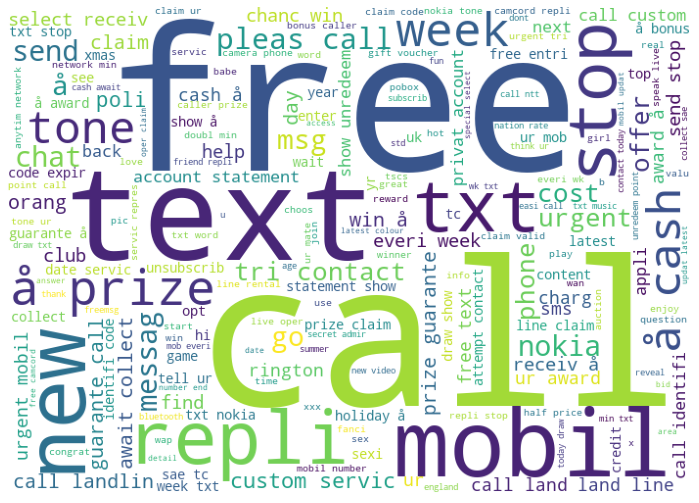

In [157]:
spam_word_cloud = WordCloud(
	width=700,
	height=500,
	background_color='white',
)
spam_word_cloud.generate(' '.join(text for text in messages.loc[messages['label'] == 1, 'message_clean']))
plt.figure(figsize=(15, 9))
plt.axis("off")
plt.imshow(spam_word_cloud)
plt.show()

Wektoryzacja

In [149]:
x = messages['message_clean']
y = messages['label']

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=1337)

count_vectorizer = CountVectorizer(
	stop_words='english',
	ngram_range=(1, 2),
	max_df=0.75,
	min_df=0.05,
	max_features=100
)

x_train_count_matrix = count_vectorizer.fit_transform(x_train)
x_test_count_matrix = count_vectorizer.transform(x_test)

In [159]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

x_train_tfidf = tfidf_transformer.fit_transform(x_train_count_matrix)
x_test_tfidf = tfidf_transformer.transform(x_test_count_matrix)

Padding wektorów

In [173]:
from tensorflow.keras.preprocessing.text import Tokenizer

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(messages['message_clean'])

In [174]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_messages = pad_sequences(
	word_tokenizer.texts_to_sequences(x),
	padding='post'
)

(5572, 76)

In [175]:
max_padded_len = padded_messages.shape[1]
padded_messages

array([[   2, 3100,  257, ...,    0,    0,    0],
       [   7,  221,  501, ...,    0,    0,    0],
       [   9,  338,  556, ...,    0,    0,    0],
       ...,
       [6632,  956, 6633, ...,    0,    0,    0],
       [ 126, 1196, 1545, ...,    0,    0,    0],
       [1921,  358,    0, ...,    0,    0,    0]])

GloVe

In [177]:
import numpy as np

embeddings_dictionary = dict()
embedding_dim = 100

with open('../glove/glove.6B.100d.txt', encoding='utf8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions

In [ ]:
len(word_tokenizer.word_index.items())

In [178]:
embedding_matrix = np.zeros((len(word_tokenizer.word_index) + 1, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

IndexError: index 77 is out of bounds for axis 0 with size 77